## Домашняя работа по теме "Масштабирование признаков. Регуляризация. Стохастический градиентный спуск"

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [1]:
import numpy as np

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [4]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [5]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [6]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * (W/np.absolute(W)) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [7]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.15180664  2.09755635  2.2183353   3.0702783 ], error 3333.3152989198875
Iter: 500, weights: [56.49995     6.302866   -0.3556717   6.57094184], error 24.904618968977484
Iter: 1000, weights: [56.49995     6.30289122 -0.35579345  6.57104233], error 24.90461894099703
Iter: 1500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099617
Iter: 2000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 2500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 3500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4000, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Iter: 4500, weights: [56.49995     6.30289122 -0.35579346  6.57104233], error 24.90461894099619
Final MSE: 24.90461894099619


array([56.49995   ,  6.30289122, -0.35579346,  6.57104233])

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Для того, чтобы проверить это утверждение посмотрим на графики распределения до нормализации и стандартизиции и после.
Итак, графики "ДО":

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
X_frame = pd.DataFrame({'w_o': X[:, 0],
                        'lessons': X[:, 1],
                        'price': X[:, 2],
                        'subjects': X[:, 3]}
                    )
X_frame

,w_o,lessons,price,subjects
0,1,1,500,1
1,1,1,700,1
2,1,2,750,2
3,1,5,600,1
4,1,3,1450,2
5,1,0,800,1
6,1,5,1500,3
7,1,10,2000,3
8,1,1,450,1
9,1,2,1000,2


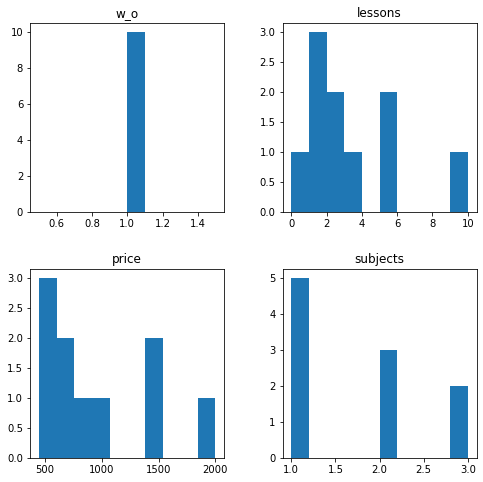

In [10]:
X_frame.hist(figsize=(8,8), grid=False);

Теперь сделаем нормализацию и стандартизацию признаков.

In [11]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [12]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])

X_frame_norm = pd.DataFrame({'w_o': X_norm[:, 0],
                        'lessons': X_norm[:, 1],
                        'price': X_norm[:, 2],
                        'subjects': X_norm[:, 3]}
                    )
X_frame_norm

,w_o,lessons,price,subjects
0,1.0,0.1,0.032258,0.0
1,1.0,0.1,0.161290,0.0
2,1.0,0.2,0.193548,0.5
3,1.0,0.5,0.096774,0.0
4,1.0,0.3,0.645161,0.5
5,1.0,0.0,0.225806,0.0
6,1.0,0.5,0.677419,1.0
7,1.0,1.0,1.000000,1.0
8,1.0,0.1,0.000000,0.0
9,1.0,0.2,0.354839,0.5


In [13]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X_norm.copy()
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_frame_norm_st = pd.DataFrame({'w_o': X_st[:, 0],
                        'lessons': X_st[:, 1],
                        'price': X_st[:, 2],
                        'subjects': X_st[:, 3]}
                    )
X_frame_norm_st

,w_o,lessons,price,subjects
0,1.0,-7.071068e-01,-0.979590,-0.896258
1,1.0,-7.071068e-01,-0.567131,-0.896258
2,1.0,-3.535534e-01,-0.464016,0.384111
3,1.0,7.071068e-01,-0.773360,-0.896258
4,1.0,-1.962616e-16,0.979590,0.384111
5,1.0,-1.060660e+00,-0.360901,-0.896258
6,1.0,7.071068e-01,1.082704,1.664479
7,1.0,2.474874e+00,2.113851,1.664479
8,1.0,-7.071068e-01,-1.082704,-0.896258
9,1.0,-3.535534e-01,0.051557,0.384111


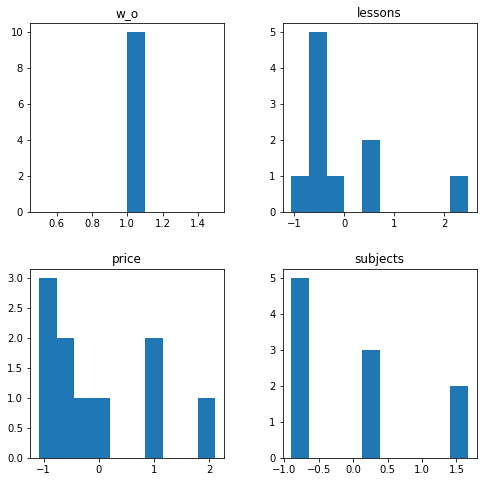

In [14]:
X_frame_norm_st.hist(figsize=(8,8), grid=False);

График распределения "lessons" отличается после нормализации и стандартизации, а этого быть не должно. Следовательно, нельзя применять вместе и нормализацию, и стандартизацию.

3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [15]:
from sklearn import datasets

In [16]:
# сгенерируем набор данных
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
X[:, 0] *= 10
display(X, Y, coef)

array([[  3.78794466,  -0.61837549],
       [ -6.52931145,  -1.06706712],
       [-10.6581629 ,  -0.34682333],
       ...,
       [ 11.94510163,   1.00147133],
       [  1.25623099,   0.35261274],
       [ -0.5674652 ,   0.41214611]])

array([-2.61123036e+01, -1.22254125e+02, -9.33701155e+01,  2.23698676e+01,
       -1.19353069e+00,  7.55093913e+01,  4.17391914e+00,  3.37850492e+01,
       -4.13327830e+01, -1.71060319e+00,  6.91533479e+01, -3.84944494e+01,
       -1.40841311e+01, -7.87094871e+00,  2.24655412e+01,  3.52449558e+01,
        3.54202311e+01,  4.54019343e+01,  3.93612257e+01,  1.13645719e-01,
       -1.23294801e+01,  1.18940297e+02,  2.90747757e+02,  1.07353713e+01,
        1.33621709e+02, -8.58105655e+01, -1.19323461e+01,  5.66776267e+01,
        1.45867826e+02, -2.72626165e+02, -3.86689973e+00,  4.64700598e+01,
        1.34844522e+02,  1.01167107e+01,  1.02407708e+01,  1.50555004e+01,
        6.05940840e+01, -1.46615087e-01, -1.04571676e+02, -1.09697817e+02,
        1.21274981e+01,  9.99648515e+01,  8.47610760e+01, -1.05265489e+02,
        1.35034101e+02, -3.24978496e+02,  6.56243085e+01, -4.80030943e+01,
        8.43343786e+01,  3.38914896e+00,  2.65015621e+01,  6.26227854e+01,
       -1.45046490e+02,  

array([62.6735955, 68.0472182])

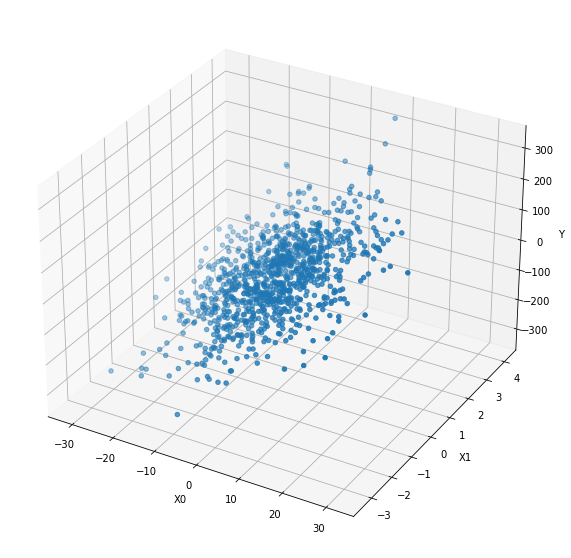

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [18]:
# Отстандартизируем признаки
means = np.mean(X, axis=0)
stds = np.std(X, axis=0)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        X[i][j] = (X[i][j] - means[j]) / stds[j]

In [19]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [20]:
# SGD
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_sgd = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-5

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    error = mserror(X, new_w, Y)
    
    w_list_sgd.append(new_w.copy())
    errors_sgd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')

    iter_num += 1
    w = new_w
    
w_list_sgd = np.array(w_list_sgd)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [-0.8770491   1.16866253], MSE = 8143.11
Iteration #100: W_new = [57.29306457 59.90767571], MSE = 114.36
Iter 122: error - 62.56838589937311, weights: [59.53482696 63.10426553]
В случае использования стохастического градиентного спуска ошибка составляет 62.5684


In [21]:
# GD
# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list_gd = [w.copy()]

# список значений ошибок после каждой итерации
errors_gd = []

# шаг градиентного спуска
eta = 0.01

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-5

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / Y.shape[0] * np.dot(X.T, y_pred - Y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, Y)
    
    w_list_gd.append(new_w.copy())
    errors_gd.append(error)
    
    if iter_num % 100 == 0:
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}')
    
    iter_num += 1
    w = new_w
    
w_list_gd = np.array(w_list_gd)

print(f'Iter {iter_num}: error - {error}, weights: {new_w}')
print(f'В случае использования градиентного спуска ошибка составляет {round(errors_gd[-1], 4)}')


Iteration #0: W_new = [1.19602793 1.32362532], MSE = 7875.58
Iteration #100: W_new = [53.00350458 58.46260608], MSE = 190.62
Iteration #200: W_new = [60.25620569 66.38834625], MSE = 41.52
Iteration #300: W_new = [61.27105576 67.48815951], MSE = 38.63
Iteration #400: W_new = [61.41300062 67.64082996], MSE = 38.57
Iteration #500: W_new = [61.43284656 67.66202988], MSE = 38.57
Iteration #600: W_new = [61.43562035 67.6649746 ], MSE = 38.57
Iter 615: error - 38.568251986787494, weights: [61.43572886 67.66508931]
В случае использования градиентного спуска ошибка составляет 38.5683


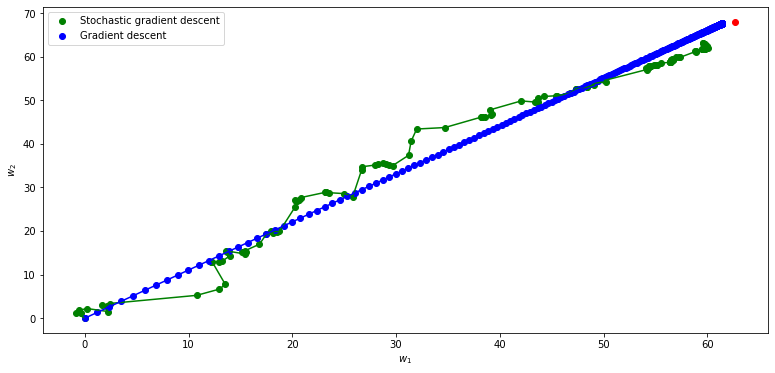

In [22]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_sgd[:, 0], w_list_sgd[:, 1], label='Stochastic gradient descent', c='g')
plt.scatter(w_list_gd[:, 0], w_list_gd[:, 1], label='Gradient descent', c='b')
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list_sgd[:, 0], w_list_sgd[:, 1], c='g')
plt.plot(w_list_gd[:, 0], w_list_gd[:, 1], c='b')
plt.legend()
plt.show()

Скорость сходимости у SGD выше, чем у GD модели, но при этом выше и ошибка.